#MODULE-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
catholic = pd.read_csv('catholic.csv')

In [ ]:
print(catholic.head())

   rownames      id  read12  math12  female  asian  hispan  black  motheduc  \
0         1  124902   61.41   49.77       0      0       0      0      14.0   
1         2  124915   58.34   59.84       0      0       0      0      14.0   
2         3  124916   59.33   50.38       1      0       0      0      14.0   
3         4  124932   49.59   45.03       1      0       0      0      12.0   
4         5  124944   57.62   54.26       1      0       0      0      12.0   

   fatheduc   lfaminc  hsgrad  cathhs  parcath  
0      12.0  10.30895     1.0       0        1  
1      14.0  10.30895     1.0       0        1  
2      11.0  10.30895     1.0       0        1  
3      14.0  10.30895     1.0       0        1  
4      12.0  10.65726     1.0       0        1  


In [ ]:
# 1. Checking Column Names and Data Types
print('\nColumn Names and Data Types:')
print(catholic.dtypes)


Column Names and Data Types:
rownames      int64
id            int64
read12      float64
math12      float64
female        int64
asian         int64
hispan        int64
black         int64
motheduc    float64
fatheduc    float64
lfaminc     float64
hsgrad      float64
cathhs        int64
parcath       int64
dtype: object


In [ ]:
# 2. Data Types: Numerical and Categorical
numerical_cols = catholic.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = catholic.select_dtypes(include='object').columns
print('\nNumerical Columns:', numerical_cols)
print('Categorical Columns:', categorical_cols)


Numerical Columns: Index(['rownames', 'id', 'read12', 'math12', 'female', 'asian', 'hispan',
       'black', 'motheduc', 'fatheduc', 'lfaminc', 'hsgrad', 'cathhs',
       'parcath'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [ ]:
# Numerical Data: Discrete vs Continuous
print('\nNumerical Data Analysis:')
discrete_cols = [col for col in numerical_cols if len(catholic[col].unique()) < 20]
continuous_cols = [col for col in numerical_cols if col not in discrete_cols]
print('Discrete Columns:', discrete_cols)
print('Continuous Columns:', continuous_cols)


Numerical Data Analysis:
Discrete Columns: ['female', 'asian', 'hispan', 'black', 'motheduc', 'fatheduc', 'lfaminc', 'hsgrad', 'cathhs', 'parcath']
Continuous Columns: ['rownames', 'id', 'read12', 'math12']


#MODULE-2

In [ ]:
# 1. Data Deduplication
print('\nBefore Deduplication:', catholic.shape)
catholic.drop_duplicates(inplace=True)
print('After Deduplication:', catholic.shape)


Before Deduplication: (7430, 14)
After Deduplication: (7430, 14)


In [ ]:
# 2. Replacing Values
print('\nReplacing Values:')
# Example: Replacing zeros in 'math12' with the mean value
mean_math12 = catholic['math12'].replace(0, np.nan).mean()
catholic['math12'].replace(0, mean_math12, inplace=True)
print('Replaced zeros in math12 with the mean value:', mean_math12)


Replacing Values:
Replaced zeros in math12 with the mean value: 52.133623149394346


<ipython-input-9-c92dcad584b0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  catholic['math12'].replace(0, mean_math12, inplace=True)


In [ ]:
# 3. Discretization and Binning
print('\nDiscretization and Binning:')
# Example: Binning 'lfaminc' into quartiles
catholic['lfaminc_bin'] = pd.qcut(catholic['lfaminc'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print('Binned lfaminc into quartiles')


Discretization and Binning:
Binned lfaminc into quartiles


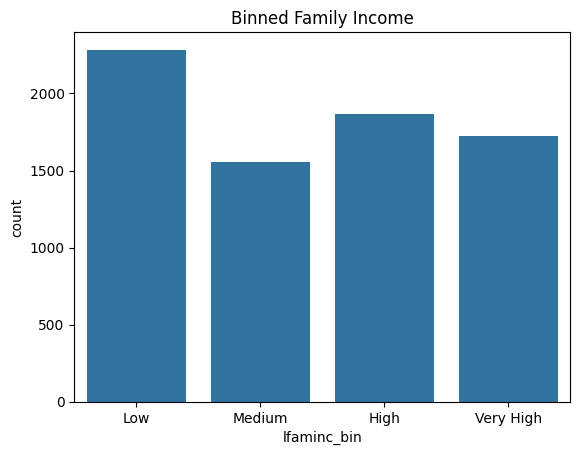

In [ ]:
# Visualizing Binning
sns.countplot(x='lfaminc_bin', data=catholic)
plt.title('Binned Family Income')
plt.show()

In [ ]:
# Checking for Missing Values
print('\nMissing Values:')
print(catholic.isnull().sum())


Missing Values:
rownames          0
id                0
read12            0
math12            0
female            0
asian             0
hispan            0
black             0
motheduc          0
fatheduc          0
lfaminc           0
hsgrad         1460
cathhs            0
parcath           0
lfaminc_bin       0
dtype: int64


In [ ]:
# 4. Handling Missing Data
# Traditional Methods: Dropping or Imputation
print('\nHandling Missing Data: Traditional Methods')
# Dropping rows with missing values
catholic_dropped = catholic.dropna()
print('After Dropping Missing Values:', catholic_dropped.shape)


Handling Missing Data: Traditional Methods
After Dropping Missing Values: (5970, 15)


#MODULE-3


Univariate Analysis:


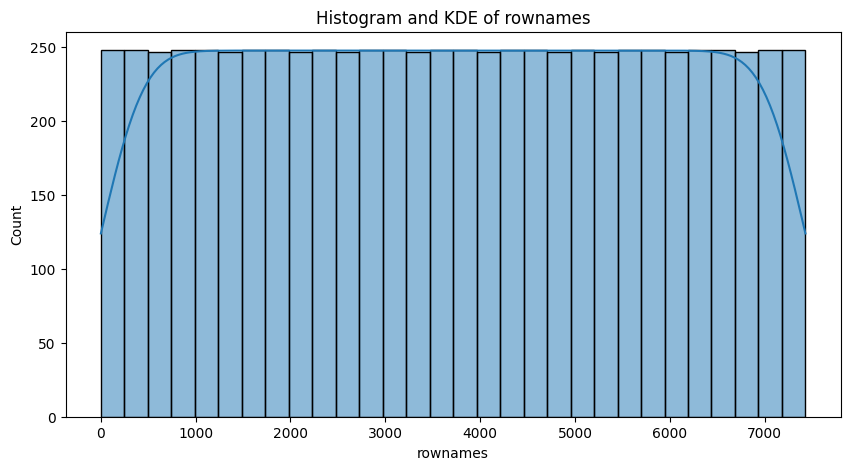

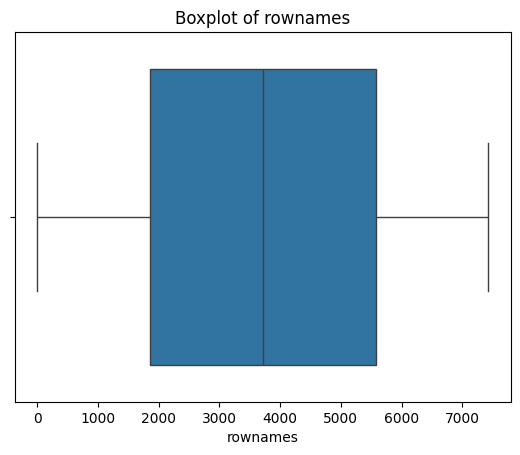

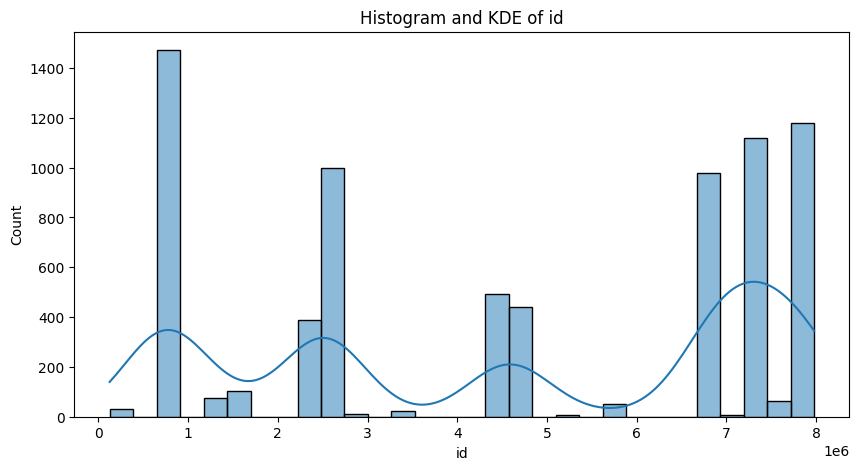

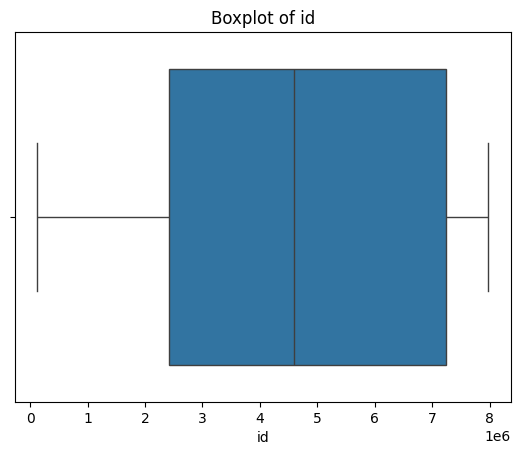

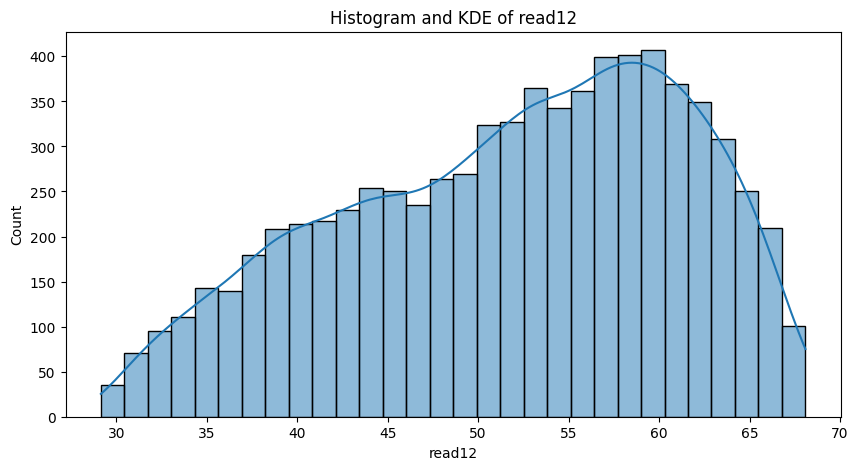

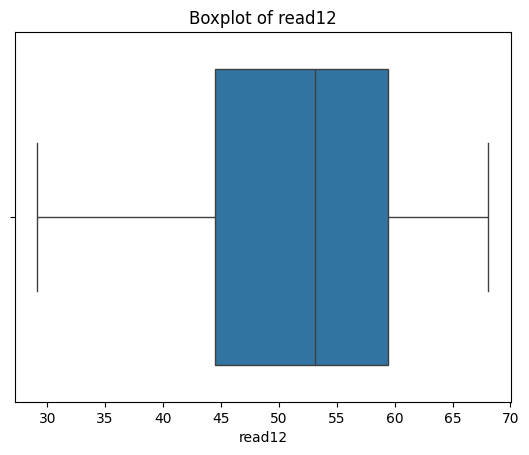

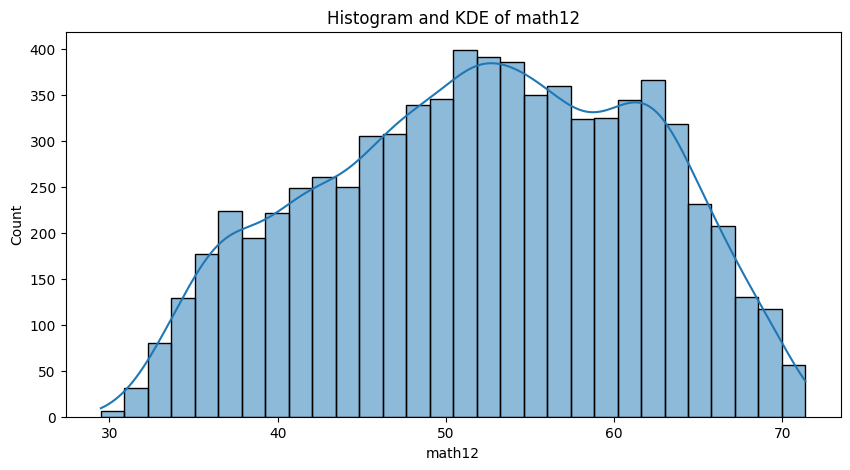

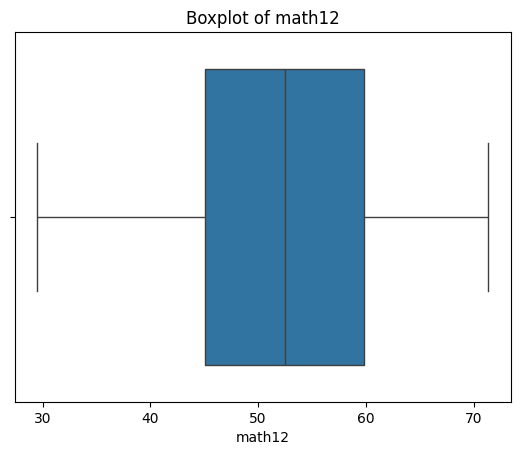

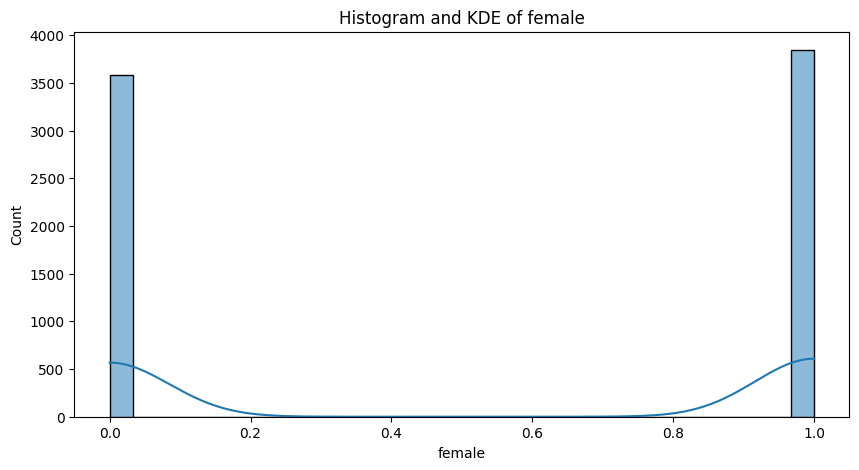

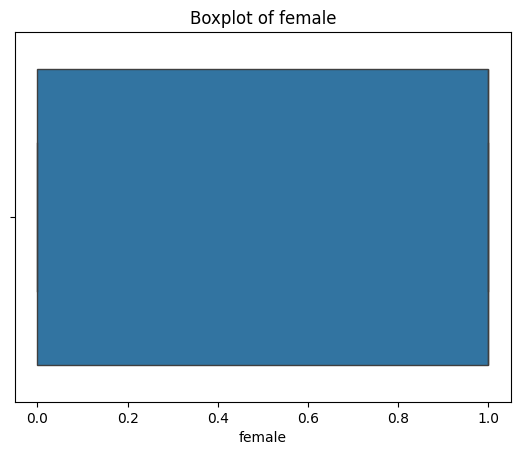

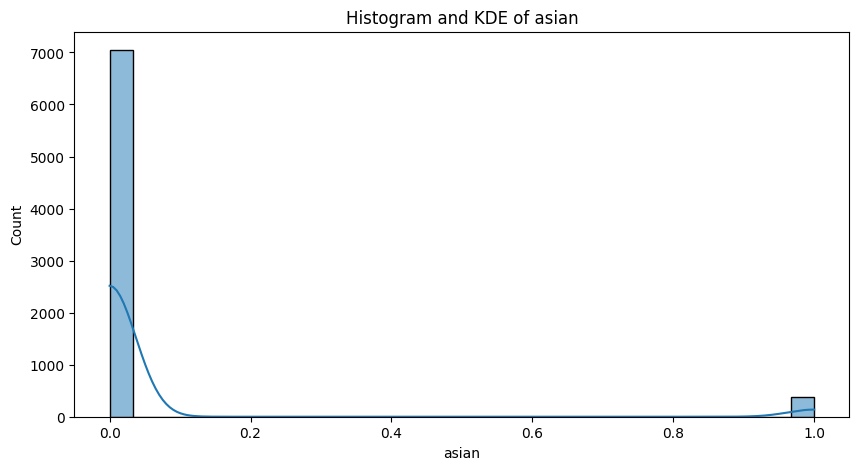

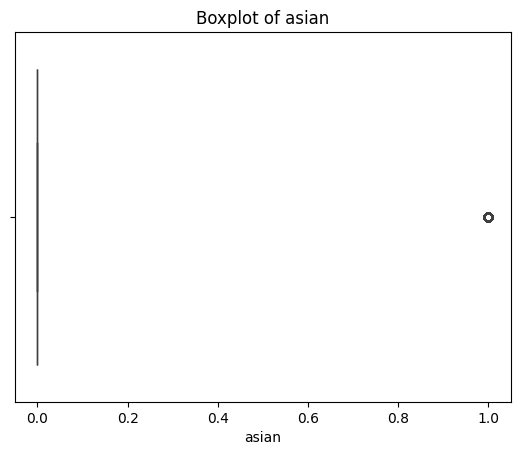

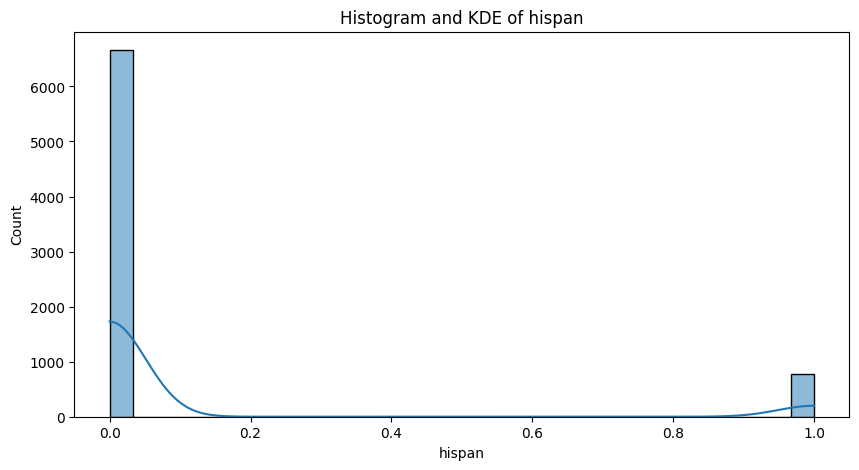

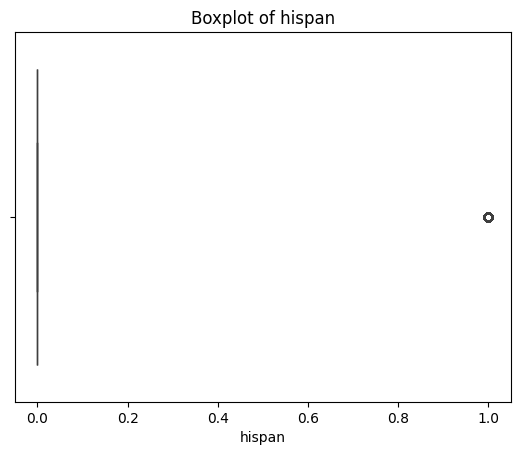

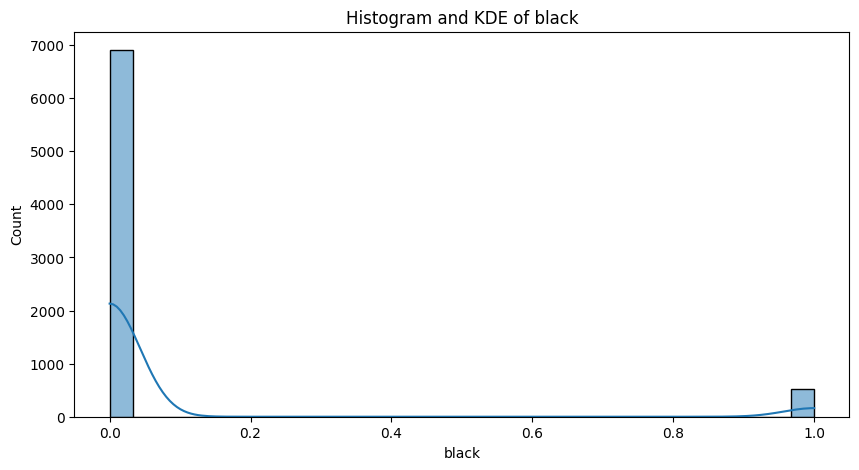

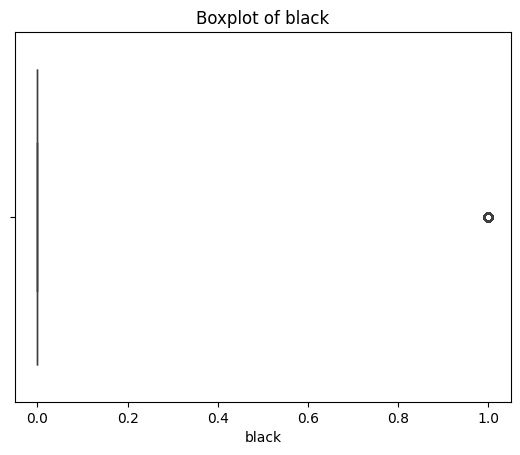

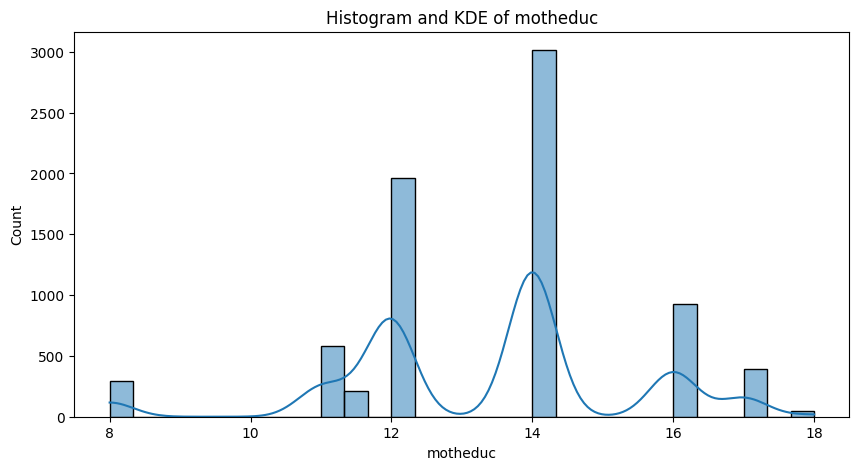

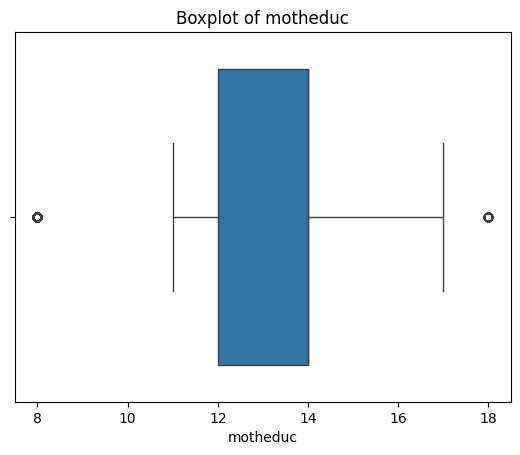

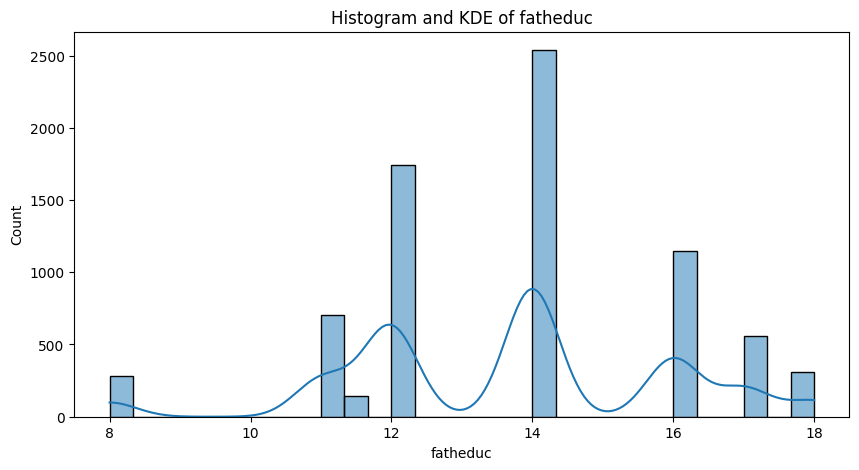

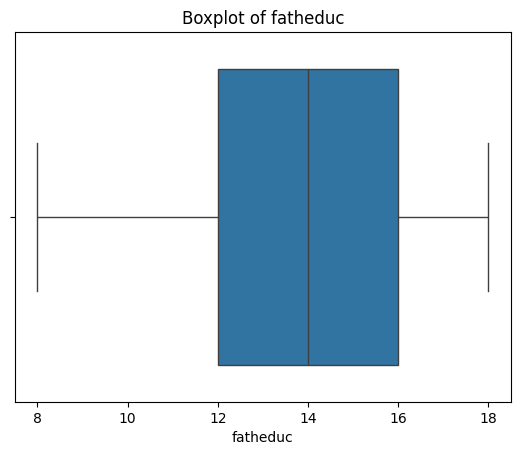

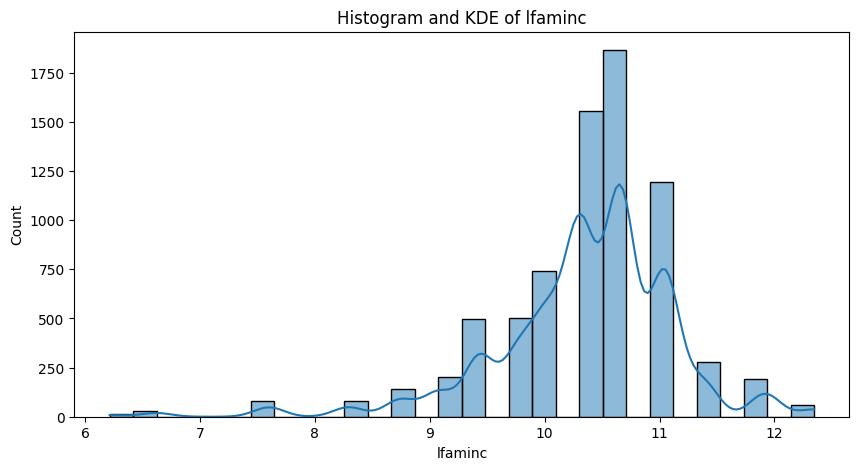

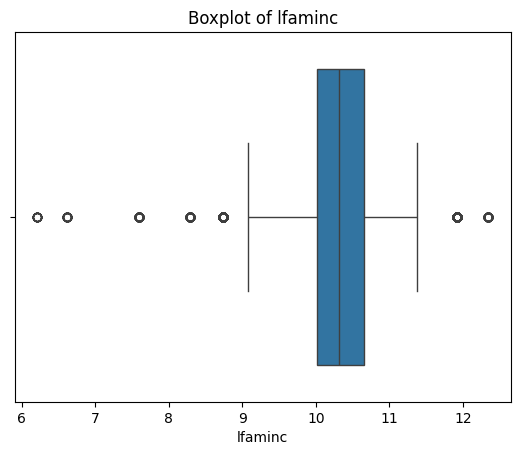

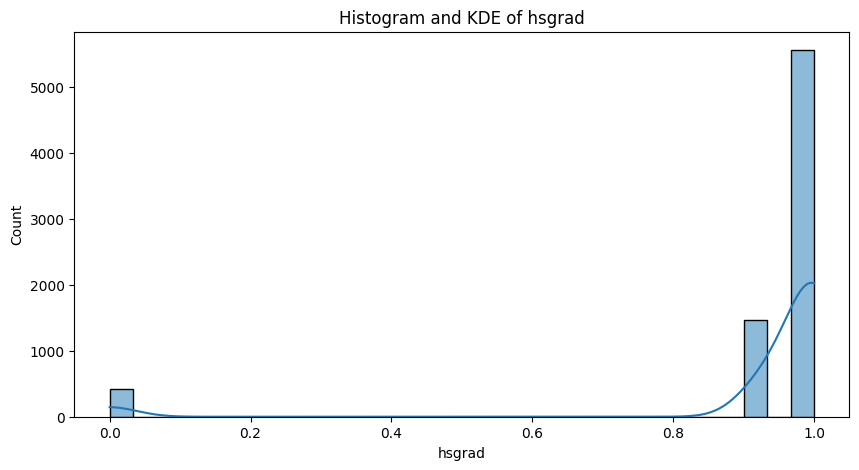

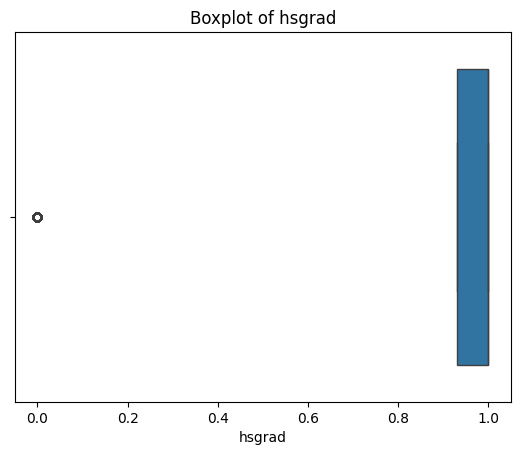

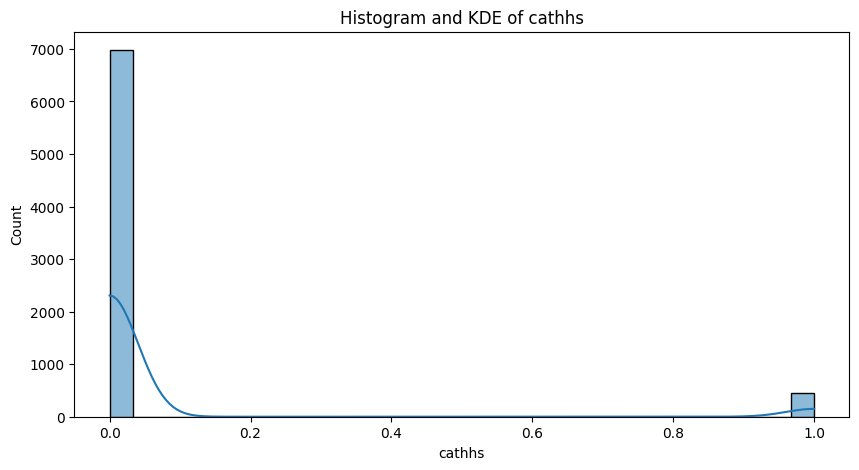

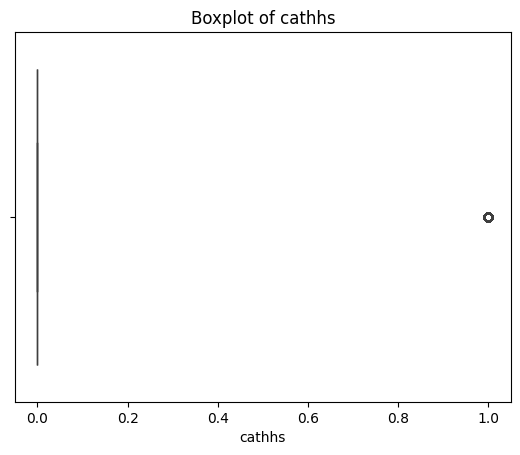

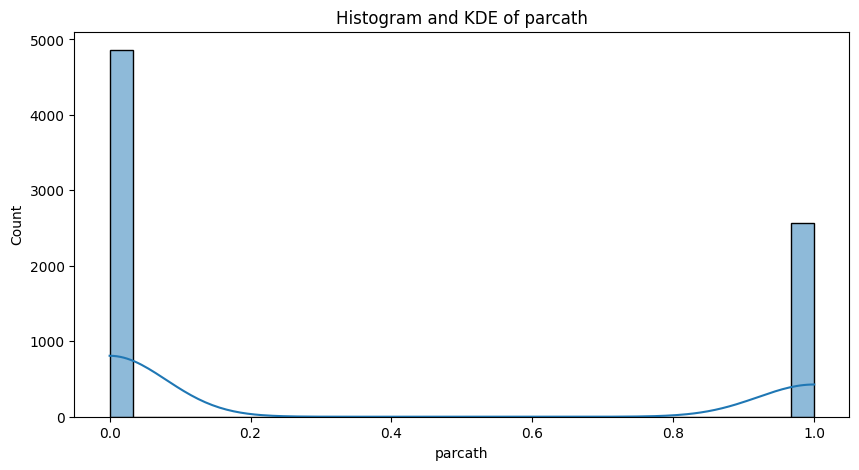

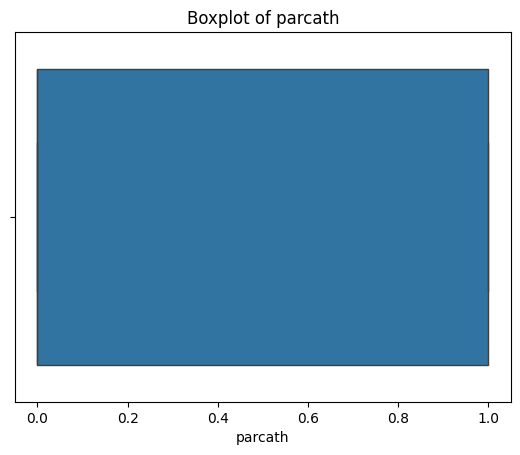

In [ ]:
# Univariate Analysis
print('\nUnivariate Analysis:')
for col in catholic.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(catholic[col], bins=30, kde=True)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()
    sns.boxplot(x=catholic[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Bivariate Analysis:


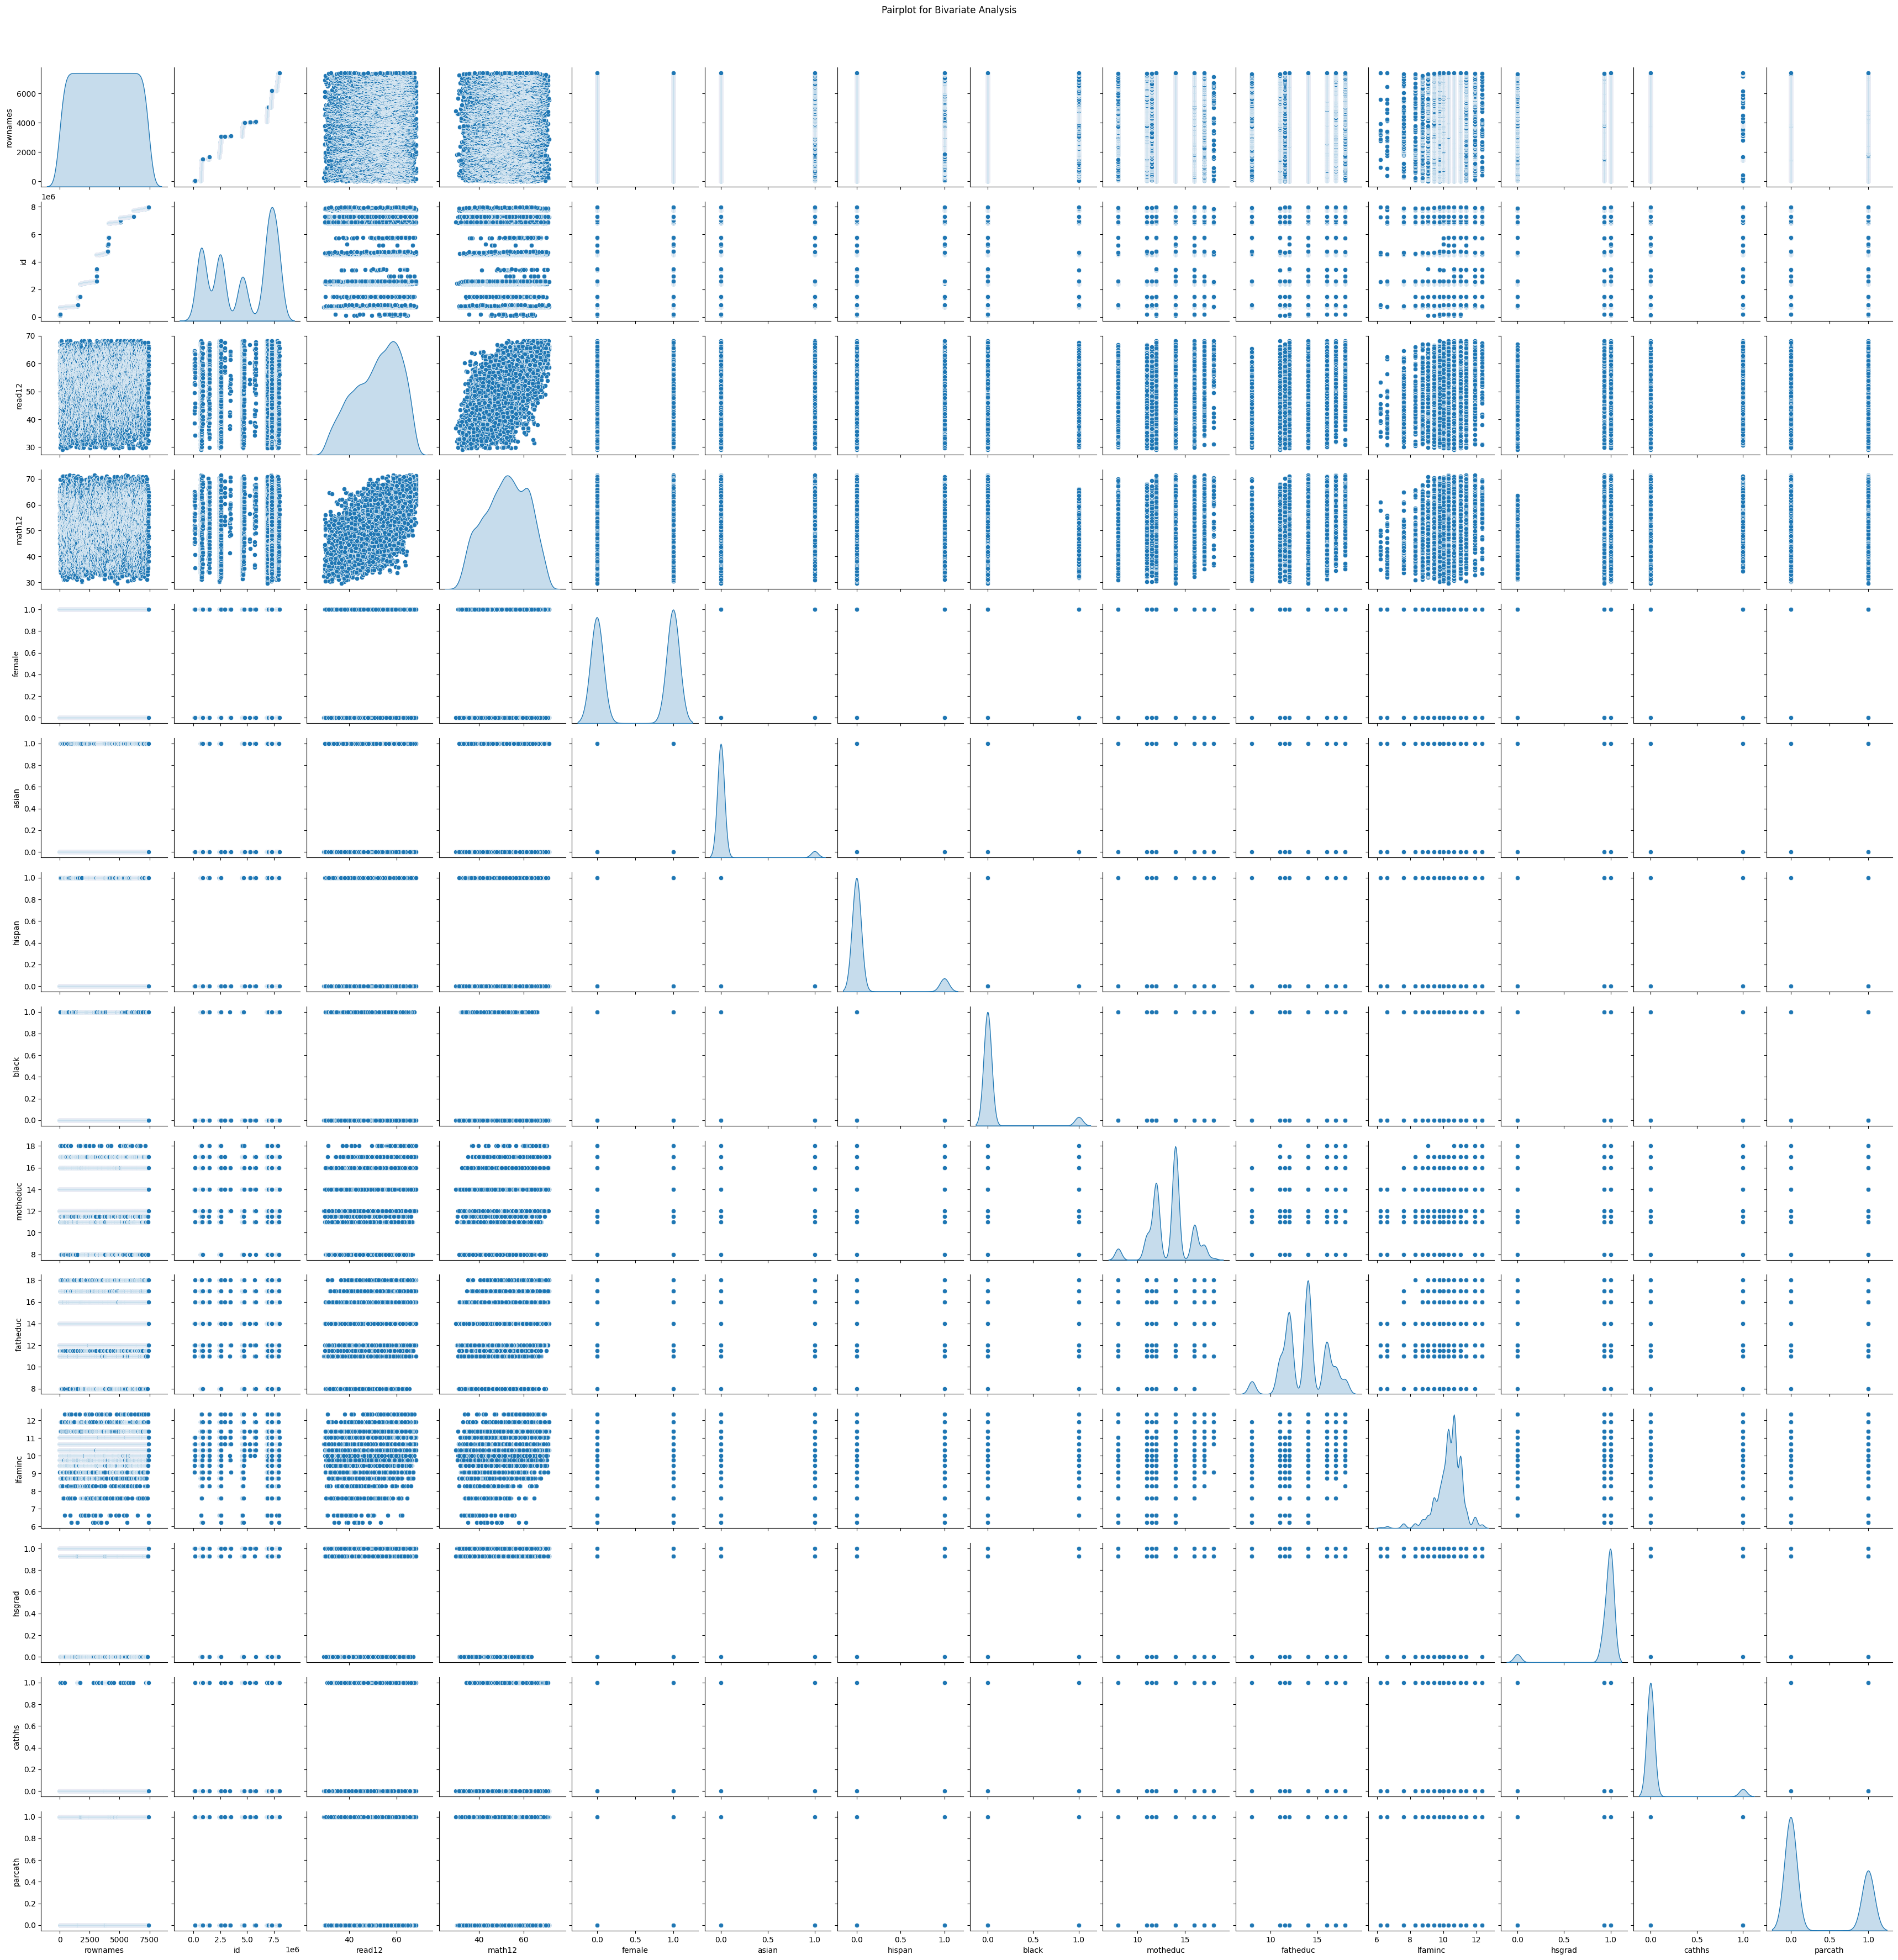

In [ ]:
# Bivariate Analysis
print('\nBivariate Analysis:')
sns.pairplot(catholic, diag_kind='kde')
plt.suptitle('Pairplot for Bivariate Analysis', y=1.02)
plt.show()


Multivariate Analysis:


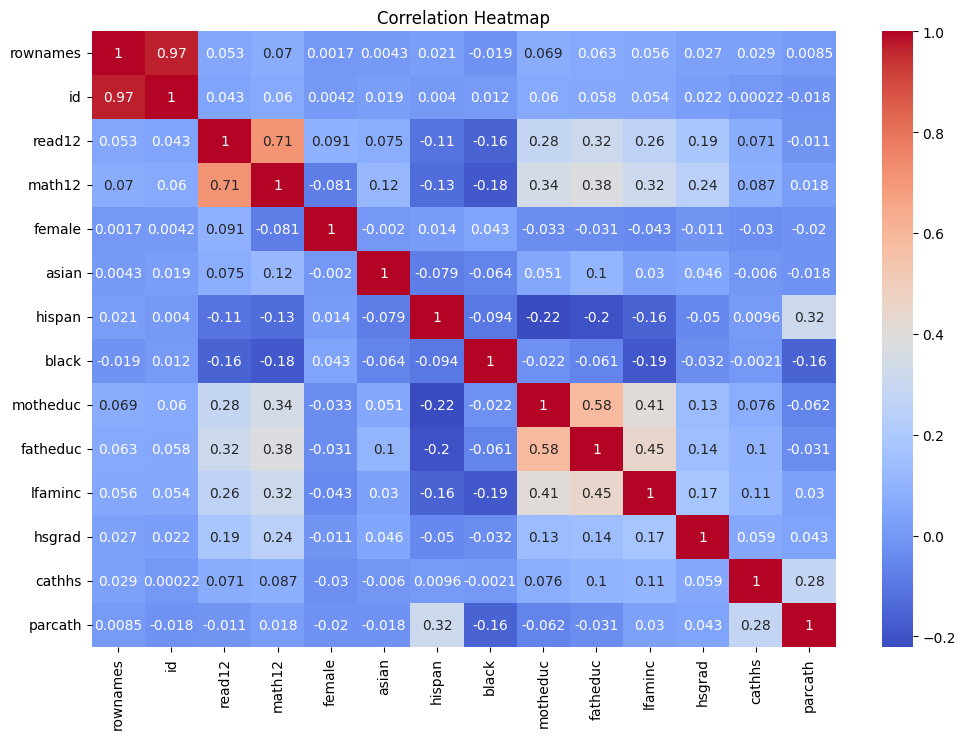

In [ ]:
# Multivariate Analysis
print('\nMultivariate Analysis:')
numeric_catholic = catholic.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_catholic.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()